In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from acquire import get_store_data
from acquire import get_power_data

### Exercise 

Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [2]:
store = get_store_data()
opsd = get_power_data()

Data is not cached. Acquiring new data...
Items data acquired...
Stores data acquired...
Sales data acquired
Saving data to .csv files
Saving all stores data to csv.
Data is cached. Reading data from .csv file.
Acquisition complete


In [3]:
# Check data types and column names
store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_id        913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_id        913000 non-null  int64  
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   item_upc12     913000 non-null  object 
 7   item_upc14     913000 non-null  object 
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_id       913000 non-null  int64  
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 97.5+ MB


* Sale_date is an object -> DatetimeIndex
* No null values
* Drop 'item_upc12','item_upc14'


In [4]:
store

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,21.0,619014,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,9,TX,78221
2017-12-31 00:00:00+00:00,32.0,620840,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,10,TX,78231
2017-12-31 00:00:00+00:00,55.0,622666,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [5]:
# Check how many states are respresented in this data. If only one state, then consider dropping. (Same with city)
store.store_state.value_counts()

TX    913000
Name: store_state, dtype: int64

In [6]:
# Check how many cities are represented in this data. If only one city, then consider dropping and only using 'store_address' and 'store_zipcode' as identifiers of location.
store.store_city.value_counts()

San Antonio    913000
Name: store_city, dtype: int64

In [7]:
# Create a new column called 'revenue' and drop 'sale_amount' and 'item_price'.
store['revenue'] = store.sale_amount * store.item_price
store

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode,revenue
sale_date,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,10.92
2013-01-01 00:00:00+00:00,26.0,211817,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,218.40
2013-01-01 00:00:00+00:00,27.0,832657,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,125.55
2013-01-01 00:00:00+00:00,54.0,213643,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,8,TX,78232,453.60
2013-01-01 00:00:00+00:00,35.0,215469,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,9,TX,78221,294.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 00:00:00+00:00,21.0,619014,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,735 SW Military Dr,San Antonio,9,TX,78221,87.57
2017-12-31 00:00:00+00:00,32.0,620840,Halls,34,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17,312546628694,312546628694,8503 NW Military Hwy,San Antonio,10,TX,78231,133.44
2017-12-31 00:00:00+00:00,55.0,622666,Natures Way,35,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,285.45


In [8]:
store.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 913000 entries, 2013-01-01 00:00:00+00:00 to 2017-12-31 00:00:00+00:00
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_id        913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_id        913000 non-null  int64  
 4   item_name      913000 non-null  object 
 5   item_price     913000 non-null  float64
 6   item_upc12     913000 non-null  object 
 7   item_upc14     913000 non-null  object 
 8   store_address  913000 non-null  object 
 9   store_city     913000 non-null  object 
 10  store_id       913000 non-null  int64  
 11  store_state    913000 non-null  object 
 12  store_zipcode  913000 non-null  object 
 13  revenue        913000 non-null  float64
dtypes: float64(3), int64(3), object(8)
memory usage: 104.5+ MB


In [9]:
# Make list of all columns to drop except unique identifiers.
columns_to_drop = ['item_upc12','item_upc14','sale_amount','item_price','store_state','store_city','sale_id','item_name','item_brand']

In [10]:
# Create a dataframe for a description of the items to tie back to later.
item_details = store[['item_id','item_brand','item_name','item_price']].set_index('item_id')

In [11]:
item_details

,item_brand,item_name,item_price
item_id,,,
1,Riceland,Riceland American Jazmine Rice,0.84
12,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40
46,Mama Marys,Pizza Sauce,4.65
12,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40
12,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40
...,...,...,...
34,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17
34,Halls,Halls Menthol Cough Suppresant/oral Anesthetic...,4.17
35,Natures Way,Natures Way Forskohlii - 60 Ct,5.19


In [12]:
df = store.drop(columns=columns_to_drop)

In [13]:
df

,item_id,store_address,store_id,store_zipcode,revenue
sale_date,,,,,
2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,1,78253,10.92
2013-01-01 00:00:00+00:00,12,12018 Perrin Beitel Rd,7,78217,218.40
2013-01-01 00:00:00+00:00,46,12018 Perrin Beitel Rd,7,78217,125.55
2013-01-01 00:00:00+00:00,12,15000 San Pedro Ave,8,78232,453.60
2013-01-01 00:00:00+00:00,12,735 SW Military Dr,9,78221,294.00
...,...,...,...,...,...
2017-12-31 00:00:00+00:00,34,735 SW Military Dr,9,78221,87.57
2017-12-31 00:00:00+00:00,34,8503 NW Military Hwy,10,78231,133.44
2017-12-31 00:00:00+00:00,35,12125 Alamo Ranch Pkwy,1,78253,285.45


### Percentage-Based Splitting

In [14]:
# train_size = .75
# n = df.shape[0]
# test_start_index = round(train_size * n)
# 
# train = df[:test_start_index]
# test = df[test_start_index:]
# 
# plt.plot(train.index, train.revenue)
# plt.plot(test.index, test.revenue)

### Human-Based Splitting

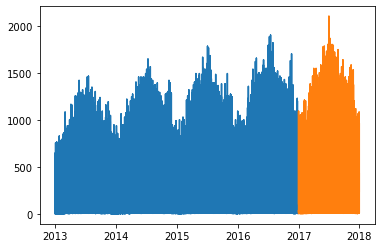

In [15]:
train = df.loc[:'2016']
test = df.loc['2017':]

plt.plot(train.index, train.revenue)
plt.plot(test.index, test.revenue)

In [16]:
# I'll set total revenue as the target and store into a variable called 'target'
target = train.revenue
target

sale_date
2013-01-01 00:00:00+00:00     10.92
2013-01-01 00:00:00+00:00    218.40
2013-01-01 00:00:00+00:00    125.55
2013-01-01 00:00:00+00:00    453.60
2013-01-01 00:00:00+00:00    294.00
                              ...  
2016-12-31 00:00:00+00:00    263.40
2016-12-31 00:00:00+00:00     92.07
2016-12-31 00:00:00+00:00    284.13
2016-12-31 00:00:00+00:00     53.38
2016-12-31 00:00:00+00:00    482.48
Name: revenue, Length: 730500, dtype: float64

### Plot a distribution of the target.

Text(0.5, 0, 'revenue')

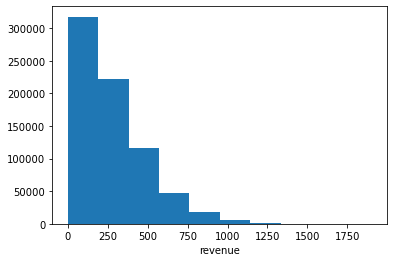

In [17]:
plt.hist(target);
plt.xlabel('revenue')

### Create a separate column for each store and plot a distribution of revenue for each location.

In [18]:
store_id = df.store_id

Text(0.5, 0, 'Time (hr)')

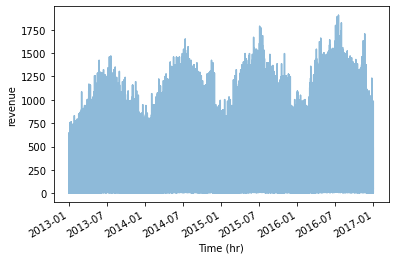

In [19]:
target.plot(alpha=.50)
plt.ylabel('revenue')
plt.xlabel('Time (hr)')

### Takaways
* There seems to be an hourly seasonality.
* There seems to be a multiplicative seasonality. 

Text(0, 0.5, 'Average Revenue')

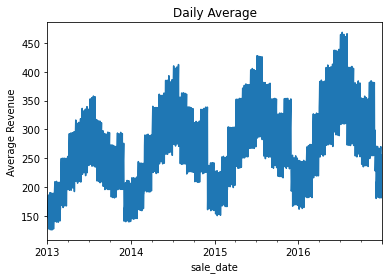

In [20]:
target.resample('d').mean().plot(title = 'Daily Average')
plt.ylabel('Average Revenue')

### Takeaway
* Company-wide there seems to be a daily seasonality.
* Seasonality again seems multiplicative.

<AxesSubplot:title={'center':'Weekly Average'}, xlabel='sale_date'>

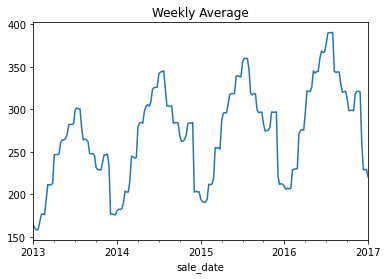

In [21]:
target.resample('w').mean().plot(title = 'Weekly Average')

### Takeaways
* Company-wide there seems to be a weekly seasonality.
* Maybe a multiplicative seasonality again.

<AxesSubplot:title={'center':'Monthly Average'}, xlabel='sale_date'>

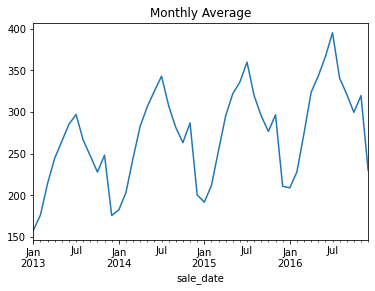

In [22]:
target.resample('M').mean().plot(title = 'Monthly Average')

### Takeaways
* Company-wide there seems to be a monthly seasonality.
* Maybe a multiplicative seasonality again.

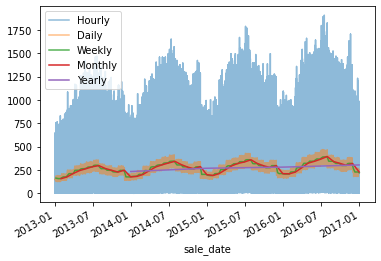

In [23]:
ax = target.plot(alpha=.5, label='Hourly')
target.resample('D').mean().plot(ax=ax, alpha=.5, label='Daily')
target.resample('W').mean().plot(ax=ax, alpha=.8, label='Weekly')
target.resample('M').mean().plot(ax=ax, label='Monthly')
target.resample('Y').mean().plot(label='Yearly')
ax.legend(loc = 'upper left')

### Create a separate dataframe for each store and explore each store individually

In [25]:
store_1 = train[train.store_id == 1]
store_2 = train[train.store_id == 2]
store_3 = train[train.store_id == 3]
store_4 = train[train.store_id == 4]
store_5 = train[train.store_id == 5]
store_6 = train[train.store_id == 6]
store_7 = train[train.store_id == 7]
store_8 = train[train.store_id == 8]
store_9 = train[train.store_id == 9]
store_10 = train[train.store_id == 10]